<div >
<h1 style="text-align: center;font-size: 100px;font-weight:2000;color:Blue;font-style: oblique;"> InfoPillarSolution</h1>   

<h1 style="text-align: center;font-size: 70px;color:Blue;font-style: oblique;">Task2</h1>
</div>




# Name - K.V.L.Amrutha
# Machine Learning
### Project idea – Fake news spreads like a wildfire and this is a big issue in this era. Build a model to distinguish between them
### Dataset : https://bit.ly/3FxCSC4


### Let's start by importing some basic important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
#import dataset
df=pd.read_csv(r"C:\Users\Admin\Downloads\news.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
#checking for null values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

### There are no null values over entire dataset

In [6]:
print("There are {} rows and {} columns in the dataframe.".format(df.shape[0],df.shape[1]))

There are 6335 rows and 4 columns in the dataframe.


In [7]:
#Statistical description of the dataframe
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [8]:
#Let's drop unimportant columns
df=df.drop(['Unnamed: 0'],axis=1)

In [9]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [10]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

## Visualizations

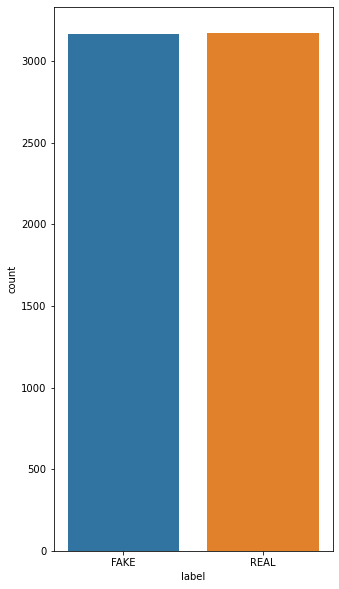

In [11]:
plt.figure(figsize=(5,10));
sns.countplot(df['label']);

## Define x and y

In [12]:
x = df.iloc[ : , :-1].values
y = df.iloc[ : , -1].values

## Import CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english",max_features=1000)

In [14]:
x1=vect.fit_transform(x[:,0]).todense()

In [15]:
x2=vect.fit_transform(x[:,1]).todense()

In [16]:
x_mat=np.hstack((x1,x2))

In [17]:
x_mat

matrix([[0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Split the data into train and test datasets

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_mat,y,random_state=1000)

## Create model

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy")

## Train the model

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Predict the results

In [21]:
y_pred=model.predict(x_test)

In [22]:
y_pred

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'REAL', 'REAL'], dtype=object)

## Find accuracy of the model

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 79.61


In [25]:
confusion_matrix(y_pred,y_test)

array([[632, 174],
       [149, 629]], dtype=int64)

<img alt="Alt text" src="https://etiquettejulie.com/wp-content/uploads/2017/01/thank-you-from-christian-vision-alliance.jpg" height=800 width=800>